In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [4]:
from google.colab import drive

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import shutil

In [8]:
output_dir1="/content/drive/MyDrive/dr_set1/DR"

In [9]:

import shutil

In [10]:
len(os.listdir(output_dir1))

1853

In [11]:
output_dir2="/content/drive/MyDrive/dr_set1/No_DR"

In [12]:
len(os.listdir(output_dir2))

1801

array([[[2, 1, 3],
        [2, 1, 3],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 0, 2],
        [2, 1, 3]],

       [[2, 1, 3],
        [2, 1, 3],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [1, 0, 2],
        [1, 0, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [1, 0, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 0, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8)
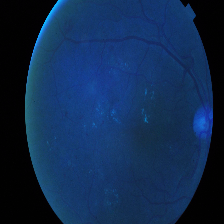

In [13]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/dr_set1/DR/000c1434d8d7.png'))
img

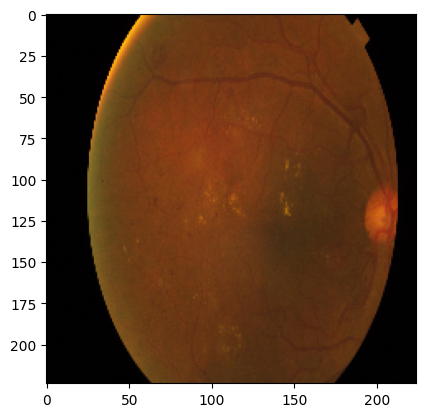

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
data_dir = "/content/drive/MyDrive/dr_set1"

In [16]:
import numpy as np

In [17]:
!ls /content/drive/MyDrive/dr_set1

DR  No_DR


In [18]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dr_set1')

Found 3654 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch =  data_iterator.next()

In [21]:
batch[0].shape

(32, 256, 256, 3)

In [22]:
batch[1]

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

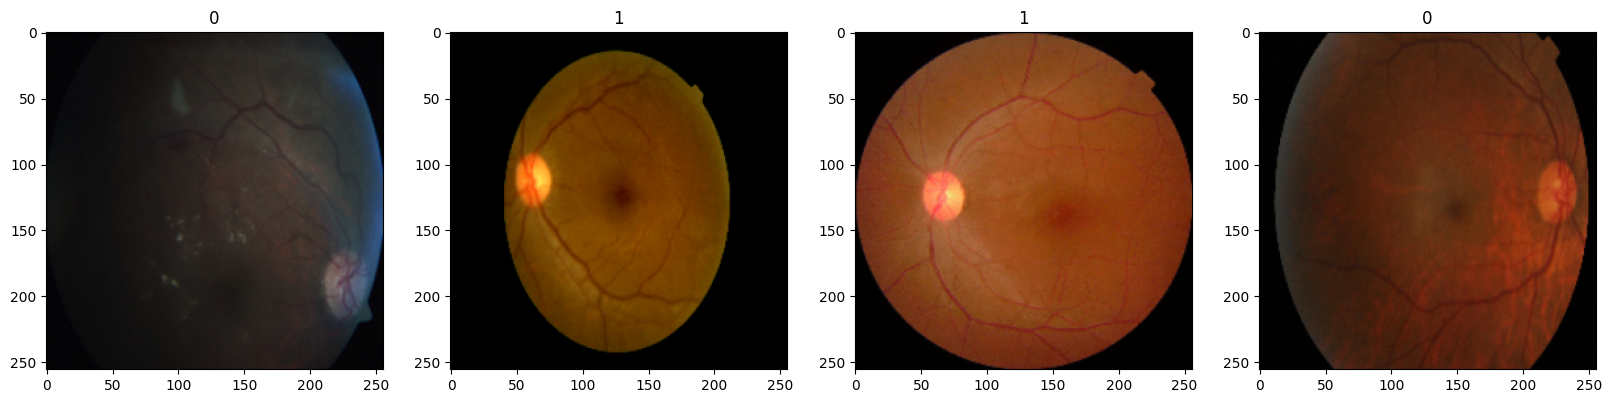

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x,y: (x/255,y))

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

In [27]:
batch[0].max()

1.0

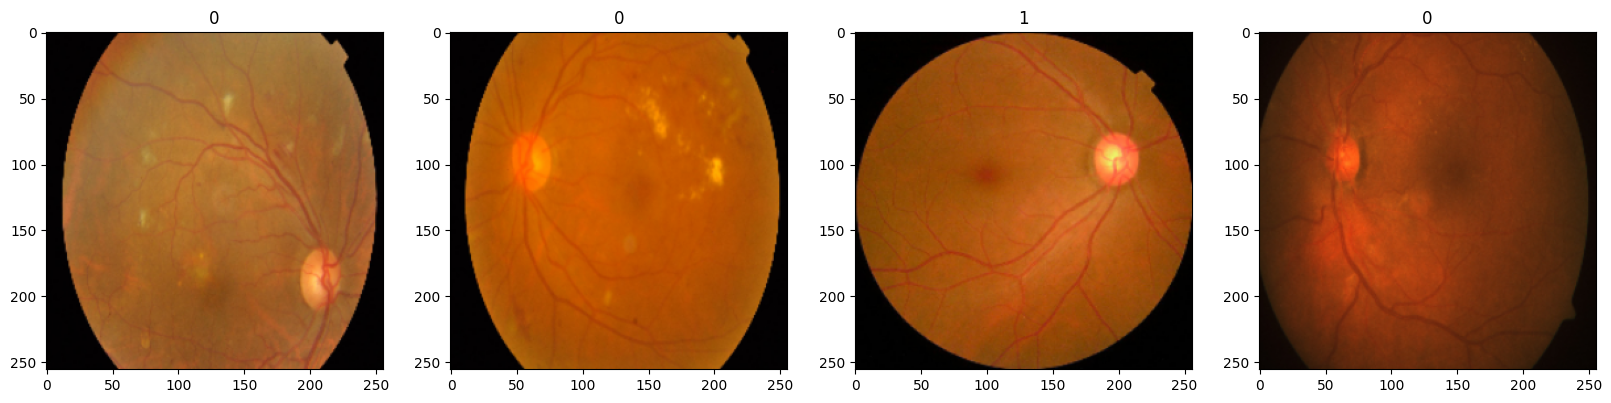

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [29]:
len(data)

115

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [32]:
print(train_size, val_size, test_size)

80 23 11


In [33]:
len(test)

11

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D

In [35]:
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(256,256,3))

16705208/16705208 [==============================] - 1s 0us/step


In [36]:
for layer in base_model.layers:
  layer.trainable = False

In [37]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [38]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss=tf.losses.BinaryCrossentropy(),
             metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0][0]']   

In [40]:
model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
80/80 [==============================] - 441s 5s/step - loss: 0.7183 - accuracy: 0.4996 - precision: 0.4891 - recall: 0.4264 - val_loss: 0.7015 - val_accuracy: 0.5136 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
80/80 [==============================] - 428s 5s/step - loss: 0.7056 - accuracy: 0.5082 - precision: 0.4976 - recall: 0.4179 - val_loss: 0.7137 - val_accuracy: 0.4932 - val_precision: 0.4932 - val_recall: 1.0000
Epoch 3/10
80/80 [==============================] - 426s 5s/step - loss: 0.7005 - accuracy: 0.4852 - precision: 0.4757 - recall: 0.3938 - val_loss: 0.6935 - val_accuracy: 0.4742 - val_precision: 0.4742 - val_recall: 1.0000
Epoch 4/10
80/80 [==============================] - 372s 5s/step - loss: 0.6990 - accuracy: 0.4863 - precision: 0.4764 - recall: 0.4165 - val_loss: 0.6930 - val_accuracy: 0.5122 - val_precision: 0.5122 - val_recall: 1.0000
Epoch 5/10
80/80 [==============================] - 423s 5s/step - loss: 0.6961 - accuracy: 0.4781 -

In [41]:
model.evaluate(test)

11/11 [==============================] - 52s 3s/step - loss: 0.6989 - accuracy: 0.4943 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6988500356674194, 0.4943181872367859, 0.0, 0.0]